In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import db_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
dataset_name = 'MNIST-SMALL'
db_name = 'DB_{}'.format(dataset_name)
key_name_in_DB = 'constraints'
dfc = db_utils.load_data(db_name, key_name_in_DB)
dfc = dfc.loc[:, dfc.columns != 'reproduce_seed']

In [17]:
def _plot_bar_err_by_nconstraints(dfc, ax, perp=None, key='s_all'):
    if perp is None:
        title = ' with all perplexities ({})'.format(dataset_name)
    else:
        title = ' with perp={:.5f}'.format(perp)
        dfc = dfc[(dfc.perp==perp)]
    dfc3 = dfc.groupby('n_constraints')

    means = dfc3[key].mean()
    errors = dfc3[key].std()
    means.plot.bar(yerr=errors, ax=ax, color='#22493031')
    ax.set_title('$S_{M+C}$' + title)

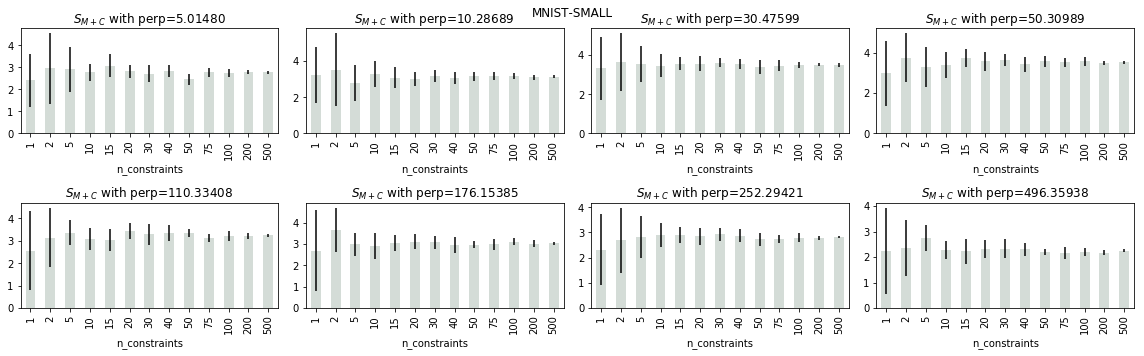

In [18]:
fig, ax = plt.subplots(2, 4, figsize=(16, 5))
perps = [5.014803659274878, 10.286892100200587, 30.475989753359674, 50.30988706579206, 
         110.33407608473023, 176.15385478640795,  252.2942057552399, 496.35937989575154]
for i, perp in enumerate(perps):
    r, c = i//4, i%4
    _plot_bar_err_by_nconstraints(dfc, ax[r][c], perp)

plt.suptitle(dataset_name)
plt.tight_layout()
plt.savefig('./plots/[{}]S_all_nconstraints.png'.format(dataset_name))
plt.show()

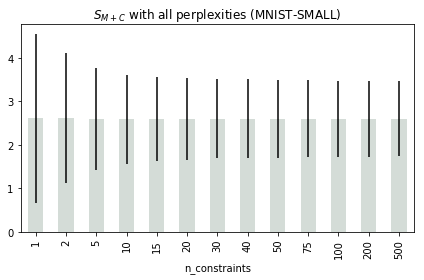

In [11]:
fig, ax = plt.subplots()
_plot_bar_err_by_nconstraints(dfc, ax)
plt.tight_layout()
plt.savefig('./plots/[{}]S_all_nconstraints.png'.format(dataset_name))

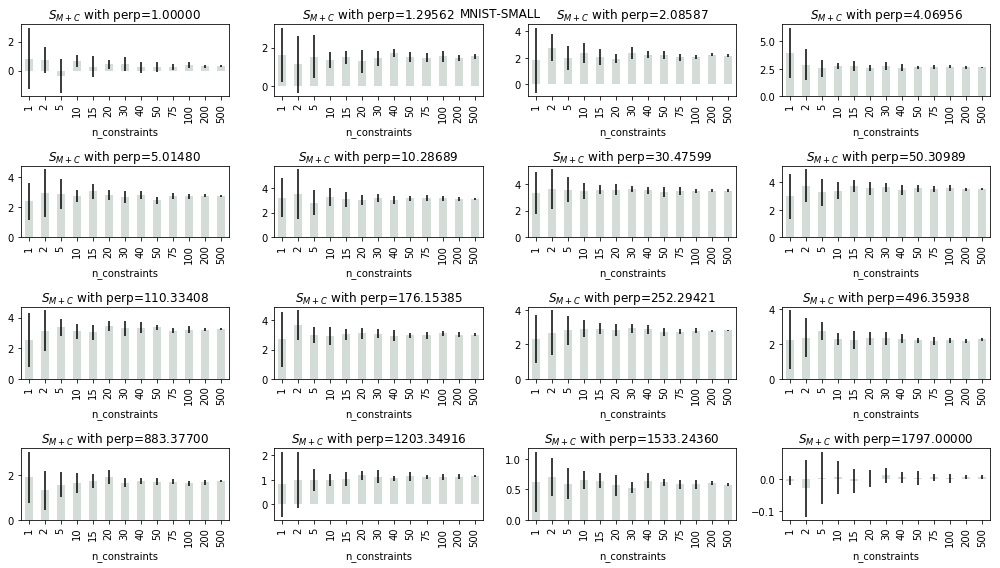

In [12]:
fig, ax = plt.subplots(4, 4, figsize=(14, 8))
perps = [1.0, 1.2956151583655902, 2.0858677424581504, 4.069560093840703,
         5.014803659274878, 10.286892100200587, 30.475989753359674, 50.30988706579206, 
         110.33407608473023, 176.15385478640795,  252.2942057552399, 496.35937989575154,
         883.3769955782541, 1203.34915757159, 1533.2436027097613, 1796.9999999999998
        ]
for i, perp in enumerate(perps):
    r, c = i//4, i%4
    _plot_bar_err_by_nconstraints(dfc, ax[r][c], perp)

plt.suptitle(dataset_name)
plt.tight_layout()
plt.savefig('./plots/[{}]S_all_nconstraints_more.png'.format(dataset_name))
plt.show()

In [ ]:
# look at all perp values
list_perps = sorted(dfc.perp.unique())
print(list_perps)